In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_csv("student-mat.csv")

In [109]:
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [110]:
data["grade"] = (data["G1"] + data["G2"] + data["G3"]) / 3  # drop other grades

In [111]:
data["family_education"] = data["Medu"] + data["Fedu"]
data["family_education"] = data["family_education"].replace({1 : "low", 2 : "low", 3 : "low", 4 : "medium", 5 : "medium", 6 : "medium", 7 : "high", 8 : "high"})

In [112]:
data["famsup"] = data["famsup"].replace({"yes" : 1, "no" : 0})
data["schoolsup"] = data["schoolsup"].replace({"yes" : 1, "no" : 0})
data["paid"] = data["paid"].replace({"yes" : 1, "no" : 0})
data["extra_support"] = data["famsup"] + data["schoolsup"] + data["paid"] # drop famsup, schoolsup, paid
data["extra_support"] = data["extra_support"].replace({0 : 0, 1 : 1, 2 : 1, 3 : 1})

In [124]:
data = data.rename({"guardian" : "with_parents"}, axis=1) # if 1 lives with parents if 0 other
data = data.replace({"mother" : 1, "father" : 1, "other" : 0})

In [136]:
data = data.rename({"Pstatus" : "isFamilyTogether"}, axis=1) # if together 1
data = data.replace({"T" : 1, "A" : 0})

In [ ]:
to_drop = ["G1", "G2", "G3", "famsup", "schoolsup", "paid", "Medu", "Fedu"]
data = data.drop(to_drop, axis = 1)

<Axes: >

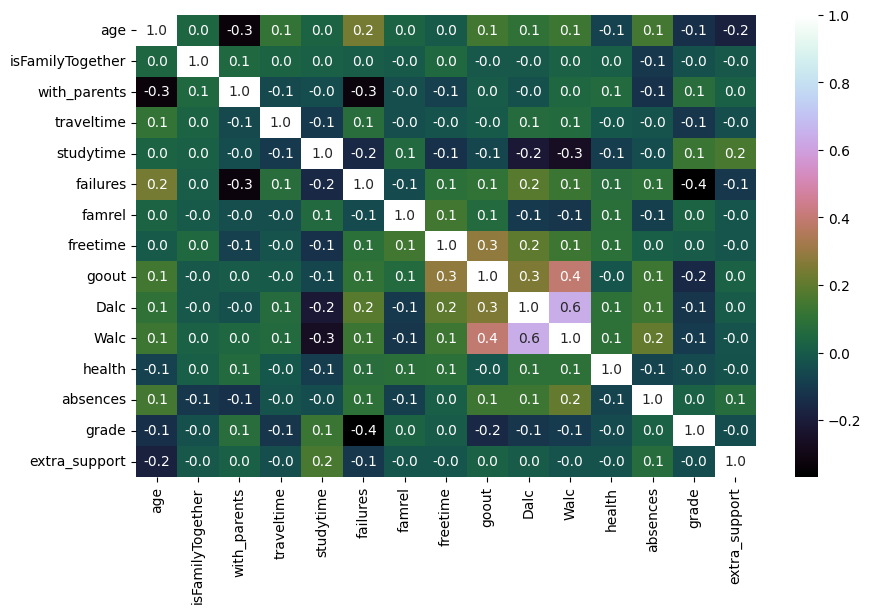

In [162]:

df = data.select_dtypes(exclude=["object"])
matrix = df.corr(method='spearman')
# mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize = (10, 6))
sns.heatmap(matrix, annot = True, xticklabels=True, yticklabels=True, cmap="cubehelix", fmt = ".1f")